# Iteration 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Data Understanding

In [4]:
df1 = pd.read_csv('set15_it1_final.csv')

In [5]:
df2 = pd.read_csv('set15_it2.csv')

In [6]:
df1

,Unnamed: 0,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit
0,0,0,149500.0,Meadowlands,Dragonspire,1157.0,12160.0,sqft
1,1,1,105000.0,GnomeBurough,Petalbridge,772.0,3960.0,sqft
2,2,2,79275.0,Meadowlands,Shadowmere,664.0,8172.0,sqft
3,3,3,140000.0,Meadowlands,Emberfall,1231.0,13825.0,sqft
4,4,4,150909.0,GnomeBurough,Mystvale,1406.0,9060.0,sqft
...,...,...,...,...,...,...,...,...
2333,2358,2335,184500.0,Meadowlands,Duskwood,1056.0,13300.0,sqft
2334,2359,2336,210000.0,Meadowlands,Nighthaven,1594.0,13175.0,sqft
2335,2360,2337,223500.0,Meadowlands,Stormwatch,1212.0,21384.0,sqft
2336,2361,2338,129900.0,Meadowlands,Dragonspire,627.0,7100.0,sqft


In [7]:
df2

,DI,StructuralIntegrity,ExteriorCharm
0,0,4,Common
1,1,8,Common
2,2,5,Common
3,3,6,Common
4,4,6,Common
...,...,...,...
2358,2335,5,Gleaming
2359,2336,6,Common
2360,2337,6,Common
2361,2338,7,Common


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   DI                   2363 non-null   int64 
 1   StructuralIntegrity  2363 non-null   int64 
 2   ExteriorCharm        2363 non-null   object
dtypes: int64(2), object(1)
memory usage: 55.5+ KB


In [9]:
df2.describe()

,DI,StructuralIntegrity
count,2363.000000,2363.000000
mean,1169.813796,5.563690
std,675.447687,1.103678
min,0.000000,1.000000
25%,584.500000,5.000000
50%,1170.000000,5.000000
75%,1753.500000,6.000000
max,2339.000000,9.000000


In [10]:
df2.sample(5)

,DI,StructuralIntegrity,ExteriorCharm
2059,2039,5,Gleaming
559,553,5,Gleaming
362,360,7,Common
882,874,5,Gleaming
126,125,5,Gleaming


In [11]:
df2.isna().sum()

DI                     0
StructuralIntegrity    0
ExteriorCharm          0
dtype: int64

In [12]:
df2['ExteriorCharm'].value_counts()

ExteriorCharm
Common        1446
Gleaming       794
Enchanting      96
Modest          27
Name: count, dtype: int64

In [13]:
df2['StructuralIntegrity'].value_counts()

StructuralIntegrity
5    1349
6     421
7     307
8     118
4      82
3      41
9      35
2       7
1       3
Name: count, dtype: int64

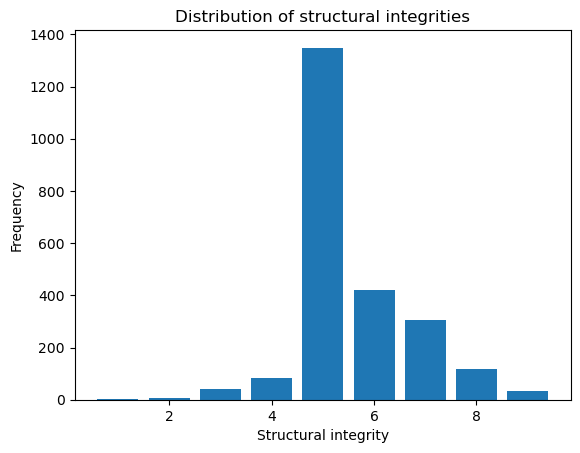

In [14]:
plt.bar([1, 2, 3, 4, 5, 6, 7, 8, 9], height=[3, 7, 41, 82, 1349, 421, 307, 118, 35])
plt.title('Distribution of structural integrities')
plt.xlabel('Structural integrity')
plt.ylabel('Frequency')
plt.show()

In [15]:
df2.loc[df2.duplicated()]

,DI,StructuralIntegrity,ExteriorCharm
61,60,6,Common
309,307,7,Common
391,388,7,Common
509,505,6,Common
522,517,5,Common
526,520,7,Common
599,592,5,Gleaming
660,652,6,Common
991,982,7,Common
1012,1002,5,Gleaming


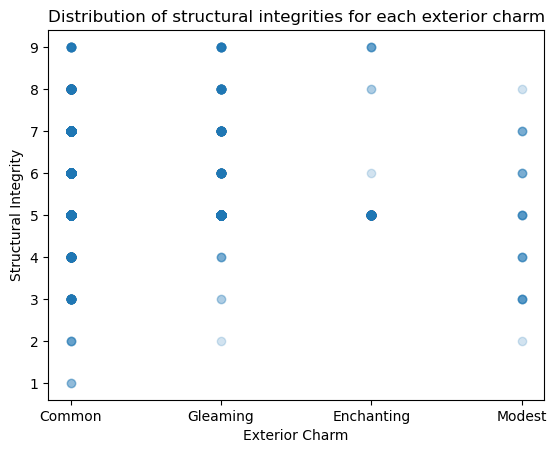

In [16]:
plt.scatter(df2['ExteriorCharm'], df2['StructuralIntegrity'], alpha=0.2)
plt.title('Distribution of structural integrities for each exterior charm')
plt.xlabel('Exterior Charm')
plt.ylabel('Structural Integrity')
plt.show()

This should give a nice general idea of how the data is distributed

## 2. Data Preparation

Since there would be a mismatch in row number otherwise, and all the data in this new set looks perfectly fine, we will first merge the datasets before repeating the data prep of iteration 1.

In [20]:
df = df1.merge(df2, left_index=True, right_index=True, how="left")

In [21]:
df

,Unnamed: 0,DI_x,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit,DI_y,StructuralIntegrity,ExteriorCharm
0,0,0,149500.0,Meadowlands,Dragonspire,1157.0,12160.0,sqft,0,4,Common
1,1,1,105000.0,GnomeBurough,Petalbridge,772.0,3960.0,sqft,1,8,Common
2,2,2,79275.0,Meadowlands,Shadowmere,664.0,8172.0,sqft,2,5,Common
3,3,3,140000.0,Meadowlands,Emberfall,1231.0,13825.0,sqft,3,6,Common
4,4,4,150909.0,GnomeBurough,Mystvale,1406.0,9060.0,sqft,4,6,Common
...,...,...,...,...,...,...,...,...,...,...,...
2333,2358,2335,184500.0,Meadowlands,Duskwood,1056.0,13300.0,sqft,2310,5,Gleaming
2334,2359,2336,210000.0,Meadowlands,Nighthaven,1594.0,13175.0,sqft,2311,5,Common
2335,2360,2337,223500.0,Meadowlands,Stormwatch,1212.0,21384.0,sqft,2312,5,Common
2336,2361,2338,129900.0,Meadowlands,Dragonspire,627.0,7100.0,sqft,2313,6,Common


Since the ParcelSizeUnit column is all just sqft, that column can be deleted and instead ParcelSize should be renamed to clarify that it's in sqft

In [23]:
df.drop(columns=['ParcelSizeUnit'], inplace=True)

In [24]:
df.head()

,Unnamed: 0,DI_x,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,DI_y,StructuralIntegrity,ExteriorCharm
0,0,0,149500.0,Meadowlands,Dragonspire,1157.0,12160.0,0,4,Common
1,1,1,105000.0,GnomeBurough,Petalbridge,772.0,3960.0,1,8,Common
2,2,2,79275.0,Meadowlands,Shadowmere,664.0,8172.0,2,5,Common
3,3,3,140000.0,Meadowlands,Emberfall,1231.0,13825.0,3,6,Common
4,4,4,150909.0,GnomeBurough,Mystvale,1406.0,9060.0,4,6,Common


In [25]:
df.rename(columns={'ParcelSize' : 'ParcelSize (sqft)'}, inplace=True)

In [26]:
df.head(1)

,Unnamed: 0,DI_x,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize (sqft),DI_y,StructuralIntegrity,ExteriorCharm
0,0,0,149500.0,Meadowlands,Dragonspire,1157.0,12160.0,0,4,Common


In [27]:
monthly_income = 2500

In [28]:
df['MonthlyPayment'] = ((df['TradeValue'] - (df['TradeValue'] * 0.2)) * (1/300) * (1 + (1/300)) ** 360) / ((1 + (1/300)) ** 360 - 1)

In [29]:
df.sample(5)

,Unnamed: 0,DI_x,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize (sqft),DI_y,StructuralIntegrity,ExteriorCharm,MonthlyPayment
650,658,651,261329.0,AetherIsles,Wyverncliff,1218.0,10440.0,643,7,Common,998.099694
1484,1501,1486,151500.0,Meadowlands,Dragonspire,736.0,12772.0,1469,5,Gleaming,578.627338
1712,1731,1714,177625.0,Meadowlands,Dragonspire,1329.0,13495.0,1695,5,Common,678.407135
859,868,860,227875.0,AetherIsles,Wyverncliff,1354.0,10207.0,851,5,Gleaming,870.328084
672,681,673,213500.0,Meadowlands,Sunspire,1382.0,9245.0,664,5,Common,815.425325


In [30]:
df.describe()

,Unnamed: 0,DI_x,TradeValue,LivingQuarters,ParcelSize (sqft),DI_y,StructuralIntegrity,MonthlyPayment
count,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000
mean,1180.940975,1169.760479,181527.821215,1152.836612,10046.660674,1157.440120,5.564585,693.313267
std,682.682722,675.842382,80164.061659,377.971615,7126.006466,668.305004,1.105235,306.172393
min,0.000000,0.000000,12789.000000,256.000000,1470.000000,0.000000,1.000000,48.845314
25%,590.250000,584.250000,129925.000000,883.000000,7427.750000,578.250000,5.000000,496.225458
50%,1181.500000,1170.500000,160350.000000,1115.000000,9375.000000,1157.500000,5.000000,612.428341
75%,1772.750000,1754.750000,213000.000000,1326.000000,11509.000000,1735.750000,6.000000,813.515663
max,2362.000000,2339.000000,625000.000000,4339.000000,164660.000000,2314.000000,9.000000,2387.076477


In [31]:
df['AffordableDwelling'] = df['MonthlyPayment'] <= (monthly_income * 0.3)

In [32]:
df.sample(5)

,Unnamed: 0,DI_x,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize (sqft),DI_y,StructuralIntegrity,ExteriorCharm,MonthlyPayment,AffordableDwelling
1302,1316,1304,107000.0,Meadowlands,Shadowmere,1283.0,8707.0,1290,5,Common,408.667493,True
1517,1534,1519,239000.0,AetherIsles,Wyverncliff,1499.0,7399.0,1502,6,Common,912.818045,False
68,69,68,82000.0,Meadowlands,Shadowmere,726.0,10206.0,67,6,Common,313.184434,True
281,282,281,157900.0,Meadowlands,Dragonspire,1109.0,9750.0,280,7,Gleaming,603.071001,True
143,144,143,611657.0,Meadowlands,Silverglen,1818.0,12919.0,142,6,Common,2336.115259,False


In [33]:
df.describe()

,Unnamed: 0,DI_x,TradeValue,LivingQuarters,ParcelSize (sqft),DI_y,StructuralIntegrity,MonthlyPayment
count,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000
mean,1180.940975,1169.760479,181527.821215,1152.836612,10046.660674,1157.440120,5.564585,693.313267
std,682.682722,675.842382,80164.061659,377.971615,7126.006466,668.305004,1.105235,306.172393
min,0.000000,0.000000,12789.000000,256.000000,1470.000000,0.000000,1.000000,48.845314
25%,590.250000,584.250000,129925.000000,883.000000,7427.750000,578.250000,5.000000,496.225458
50%,1181.500000,1170.500000,160350.000000,1115.000000,9375.000000,1157.500000,5.000000,612.428341
75%,1772.750000,1754.750000,213000.000000,1326.000000,11509.000000,1735.750000,6.000000,813.515663
max,2362.000000,2339.000000,625000.000000,4339.000000,164660.000000,2314.000000,9.000000,2387.076477


In [34]:
df["AffordableDwelling"].value_counts()

AffordableDwelling
True     1624
False     714
Name: count, dtype: int64

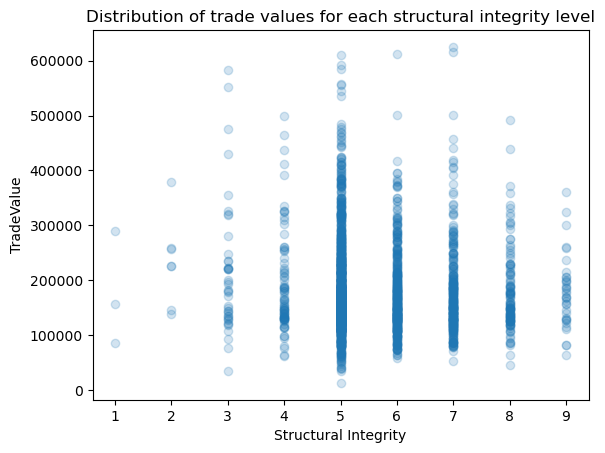

In [35]:
plt.scatter(df['StructuralIntegrity'], df['TradeValue'], alpha=0.2)
plt.title('Distribution of trade values for each structural integrity level')
plt.xlabel('Structural Integrity')
plt.ylabel('TradeValue')
plt.show()

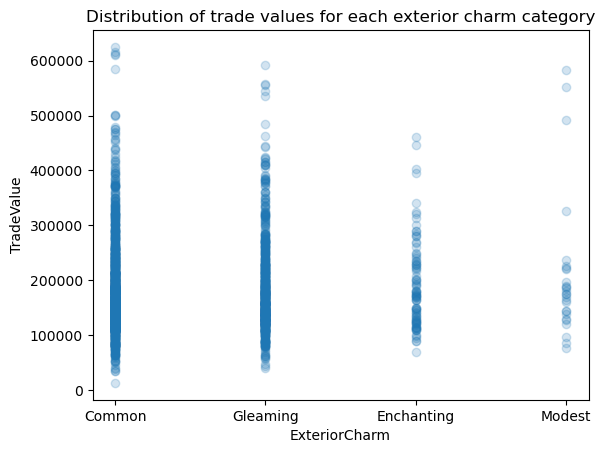

In [36]:
plt.scatter(df['ExteriorCharm'], df['TradeValue'], alpha=0.2)
plt.title('Distribution of trade values for each exterior charm category')
plt.xlabel('ExteriorCharm')
plt.ylabel('TradeValue')
plt.show()

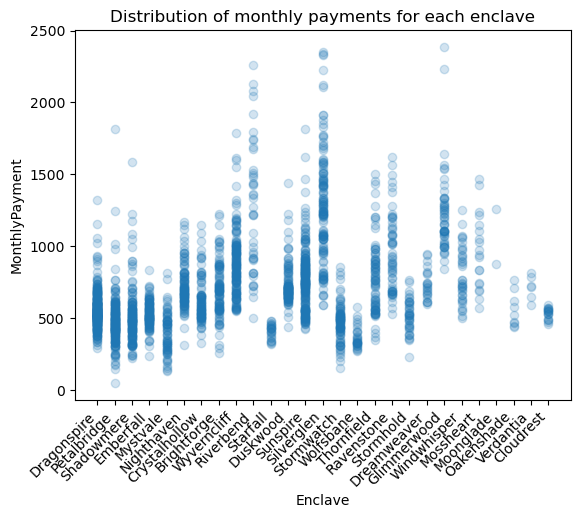

In [37]:
plt.scatter(df['Enclave'], df['MonthlyPayment'], alpha=0.2)
plt.title('Distribution of monthly payments for each enclave')
plt.xlabel('Enclave')
plt.ylabel('MonthlyPayment')
plt.xticks(ha='right', rotation=45)
plt.show()

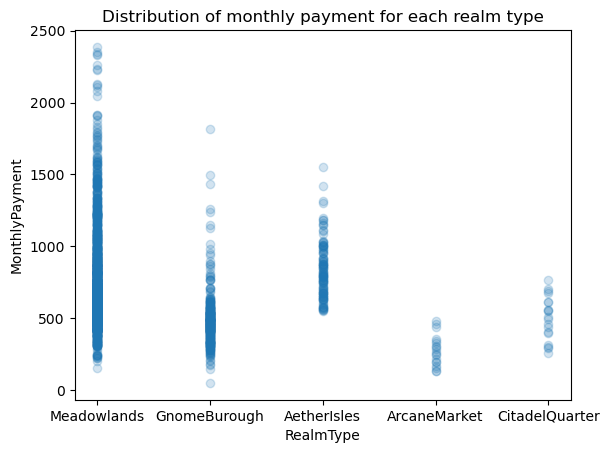

In [38]:
plt.scatter(df['RealmType'], df['MonthlyPayment'], alpha=0.2)
plt.title('Distribution of monthly payment for each realm type')
plt.xlabel('RealmType')
plt.ylabel('MonthlyPayment')
plt.show()

## 3. Modelling

### 3.1 Creating the train test split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
df

,Unnamed: 0,DI_x,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize (sqft),DI_y,StructuralIntegrity,ExteriorCharm,MonthlyPayment,AffordableDwelling
0,0,0,149500.0,Meadowlands,Dragonspire,1157.0,12160.0,0,4,Common,570.988693,True
1,1,1,105000.0,GnomeBurough,Petalbridge,772.0,3960.0,1,8,Common,401.028848,True
2,2,2,79275.0,Meadowlands,Shadowmere,664.0,8172.0,2,5,Common,302.776780,True
3,3,3,140000.0,Meadowlands,Emberfall,1231.0,13825.0,3,6,Common,534.705131,True
4,4,4,150909.0,GnomeBurough,Mystvale,1406.0,9060.0,4,6,Common,576.370119,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2333,2358,2335,184500.0,Meadowlands,Duskwood,1056.0,13300.0,2310,5,Gleaming,704.664976,True
2334,2359,2336,210000.0,Meadowlands,Nighthaven,1594.0,13175.0,2311,5,Common,802.057696,False
2335,2360,2337,223500.0,Meadowlands,Stormwatch,1212.0,21384.0,2312,5,Common,853.618548,False
2336,2361,2338,129900.0,Meadowlands,Dragonspire,627.0,7100.0,2313,6,Common,496.129975,True


In [43]:
# target is called y a lot in documentation
target = df['AffordableDwelling']

# features is called X a lot in documentation
features = df[['Enclave', 'RealmType']]

# random_state to get reproduceable results
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=3)

In [44]:
print('The length of y_train is:', len(target_train))
print('The length of y_test is:', len(target_test))

The length of y_train is: 1753
The length of y_test is: 585


### 3.2 Creating the benchmark classification model

In [46]:
df['AffordableDwelling'].value_counts()

AffordableDwelling
True     1624
False     714
Name: count, dtype: int64

In [132]:
value = 1

pred_train = [value] * len(target_train)

pred_test = [value] * len(target_test)

In [134]:
print('The length of y_train is:', len(pred_train))
print('The length of y_test is:', len(pred_test))

The length of y_train is: 1753
The length of y_test is: 585


In [164]:
from sklearn.metrics import accuracy_score
print('Accuracy of train set:', accuracy_score(target_train, pred_train))
print('Accuracy of test set:', accuracy_score(pred_test, target_test))

Accuracy of train set: 0.6908157444381061
Accuracy of test set: 0.705982905982906


In [182]:
def classification_model(row):
    if (row['RealmType'] == "ArcaneMarket" or "CitadelQuarter"):
        prediction = 1
    else:
        prediction = 0
    
    return prediction

In [184]:
df['Prediction'] = df.apply(lambda row: classification_model(row), axis=1)

In [186]:
feature_train['Prediction'] = feature_train.apply(lambda row: classification_model(row), axis=1)
feature_test['Prediction'] = feature_test.apply(lambda row: classification_model(row), axis=1)

In [188]:
print('Accuracy train set:', accuracy_score(target_train, feature_train['Prediction']))
print('Accuracy test set:', accuracy_score(target_test, feature_test['Prediction']))

Accuracy train set: 0.6908157444381061
Accuracy test set: 0.705982905982906


## 4. Evaluation

### 4.1 Confusion Matrix

In [148]:
from sklearn.metrics import confusion_matrix

In [150]:
confusion_matrix(pred_test, target_test)

array([[  0,   0],
       [172, 413]], dtype=int64)